In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
russia_alcohol = "Data/russia_alcohol.csv"
gdp_data = "Data/gdp.csv"
unemployment_data = "Data/russia-unemployment copy.csv"

# Read CSV
alc_df = pd.read_csv(russia_alcohol)
unemp_df = pd.read_csv(unemployment_data)
gdp_df_read = pd.read_csv(gdp_data)
unemp_df.head()

# API Response

,date,Unemployment Rate (%),Annual Change,
0,1991-12-31,5.405,NaN,NaN
1,1992-12-31,5.180,-0.23,NaN
2,1993-12-31,5.880,0.70,NaN
3,1994-12-31,8.130,2.25,NaN
4,1995-12-31,9.450,1.32,NaN


In [34]:
# cleaning data
# renaming column and averaging months into year
# Study data files
clean_unemp = unemp_df.dropna(axis=1)
clean_unemp.columns=["Year","Unemployment Rate (%)"]
clean_unemp['Year']= pd.to_datetime(clean_unemp['Year']).dt.strftime('%Y')
clean_unemp=clean_unemp[clean_unemp["Year"].astype(int)<=2016]
clean_unemp=clean_unemp[clean_unemp["Year"].astype(int)>=1998]

# change null values to 0
clean_alc = alc_df.dropna()
# add in a total per region
clean_alc["Total"] = clean_alc["wine"] + clean_alc["beer"] + clean_alc["vodka"] + clean_alc["champagne"] + clean_alc["brandy"]
alc_year = clean_alc.groupby(clean_alc["year"]).sum()

#clean gdp data
gdp_df=gdp_df_read.dropna()
gdp_df.columns=["Date","GDP (in billions)"]
gdp_df["GDP (in billions)"]= gdp_df["GDP (in billions)"]/1000000000
gdp_df['Date']= pd.to_datetime(gdp_df['Date']).dt.strftime('%Y')
clean_unemp.head(40)

/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/2792644786.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_unemp['Year']= pd.to_datetime(clean_unemp['Year']).dt.strftime('%Y')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/2792644786.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_alc["Total"] = clean_alc["wine"] + clean_alc["beer"] + clean_alc["vodka"] + clean_alc["champagne"] + clean_alc["brandy"]


,Year,Unemployment Rate (%)
7,1998,13.26
8,1999,13.04
9,2000,10.58
10,2001,8.98
11,2002,7.88
12,2003,8.21
13,2004,7.76
14,2005,7.12
15,2006,7.06
16,2007,6.00


In [66]:
#testing forloop for other code
unrate = []
years = ["2007", "2007", "2009", "2010"]
      
for y in years:
    for i in range(len(clean_unemp)):
        rate = clean_unemp.iloc[i,1]
        year = clean_unemp.iloc[i,0]
        if year == y:
            unrate.append(rate)
        
unrate

[6.0, 6.0, 8.3, 7.37]

<BarContainer object of 5 artists>

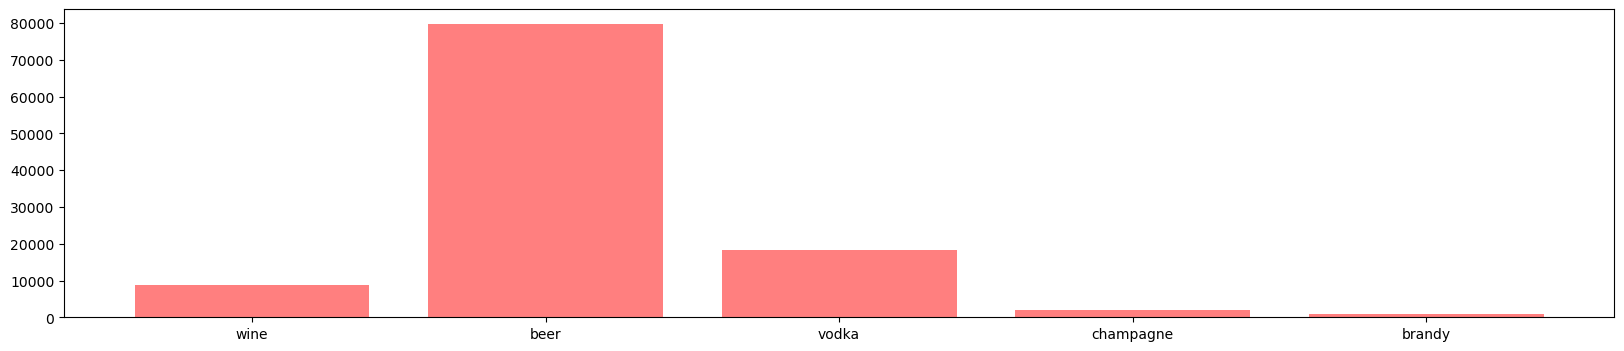

In [36]:
# What type of alcohol type is consumed most in Russia.
# plot a bar graph over the entirety of our data with total amount consumed/

tot_wine = clean_alc["wine"].sum()
tot_beer = clean_alc["beer"].sum()
tot_vodka = clean_alc["vodka"].sum()
tot_champ = clean_alc["champagne"].sum()
tot_brandy = clean_alc["brandy"].sum()

tot_alc_dict = {"Total Wine": [tot_wine], "Total Beer": [tot_beer], "Total Vodka": [tot_vodka], "Total Champagne": [tot_champ], "Total Brandy": [tot_brandy]}
tot_alc_df = pd.DataFrame(data=tot_alc_dict)

alc_list = ["wine", "beer", "vodka", "champagne", "brandy"]
plt.figure(figsize=(20,4))
plt.bar(alc_list, tot_alc_df.iloc[0,:], color='r', alpha=0.5, align="center")

<BarContainer object of 5 artists>

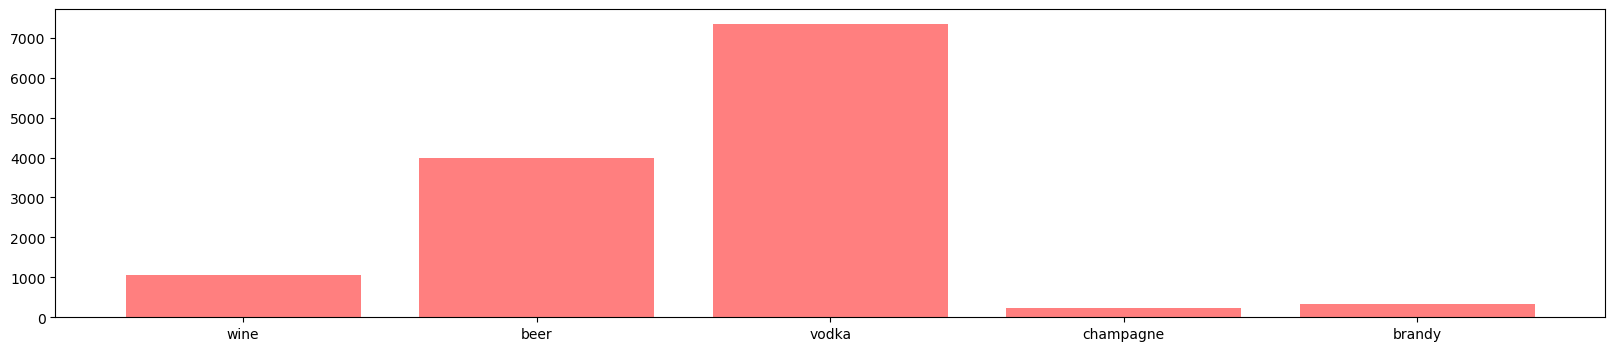

In [37]:
# plot a bar graph over the entirety of our data with total amount consumed by PERCENTAGE
# Used average alcohol percentage of each type of alcohol

tot_wine_ave = clean_alc["wine"].sum()*.12
tot_beer_ave = clean_alc["beer"].sum()*.05
tot_vodka_ave = clean_alc["vodka"].sum()*.40
tot_champ_ave = clean_alc["champagne"].sum()*.12
tot_brandy_ave = clean_alc["brandy"].sum()*.40

tot_alc_dict = {"Total Wine": [tot_wine_ave], "Total Beer": [tot_beer_ave], "Total Vodka": [tot_vodka_ave], "Total Champagne": [tot_champ_ave], "Total Brandy": [tot_brandy_ave]}
tot_alc_df = pd.DataFrame(data=tot_alc_dict)
#tot_alc_df.T

alc_list = ["wine", "beer", "vodka", "champagne", "brandy"]
plt.figure(figsize=(20,4))
plt.bar(alc_list, tot_alc_df.iloc[0,:], color='r', alpha=0.5, align="center")

In [38]:

#  Does alcohol type consumed vary by region
#  Needs API to create a map

<Figure size 640x480 with 0 Axes>

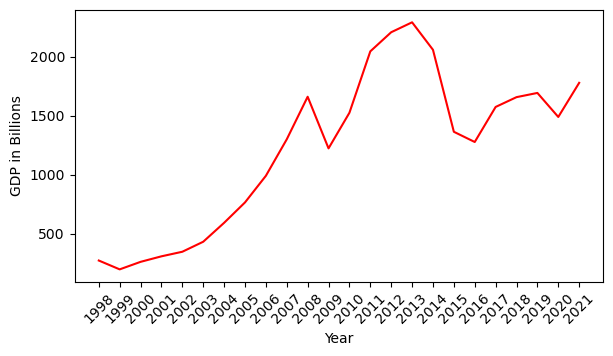

In [39]:
# Graphing GDP
fig = plt.figure()
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(3, 2, 1)
ax1.plot(gdp_df["Date"], gdp_df["GDP (in billions)"], "r")
plt.xticks(rotation = 45)
plt.ylabel("GDP in Billions")
plt.xlabel("Year")
plt.show()

/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/3065697709.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/3065697709.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/3065697709.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')


<Figure size 640x480 with 0 Axes>

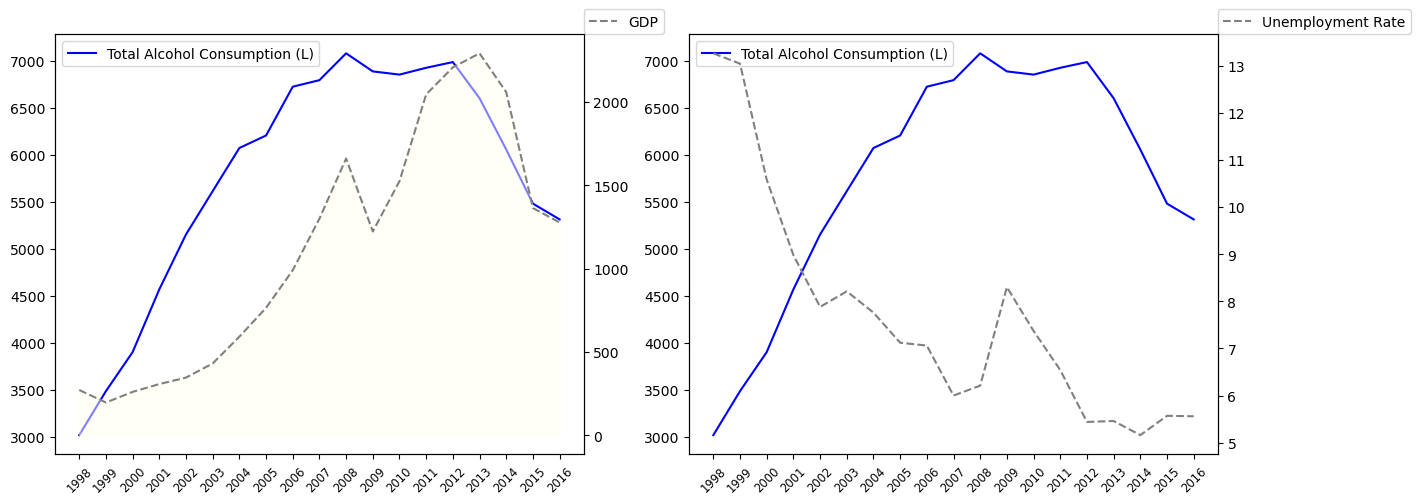

In [50]:
# How does alcohol consumption change with economic/unemployment conditions
alc_year.head()

fig = plt.figure()
fig = plt.figure(figsize=(15, 12))
x_axis=list(map(str,alc_year.index))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.plot(x_axis, alc_year["Total"], "b", label="Total Alcohol Consumption (L)")
ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax1.legend(loc="upper left")
ax1 = ax1.twinx()
ax1.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax1.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax1.legend(loc=(1.0, 1.0))

ax2.plot(x_axis, alc_year["Total"], "b", label="Total Alcohol Consumption (L)")
ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax2.legend(loc="upper left")
ax2 = ax2.twinx()
ax2.plot(x_axis, clean_unemp['Unemployment Rate (%)'], 'gray', linestyle='--', label="Unemployment Rate")
#ax2.fill_between(x_axis[0:], clean_unemp['Unemployment Rate (%)'][0:], alpha=0.5, color='ivory')
ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax2.legend(loc=(1.0, 1.0))

In [38]:
# Unemployment graph

clean_unemp.head()


,Year,Unemployment Rate (%)
0,1991,5.405
1,1992,5.180
2,1993,5.880
3,1994,8.130
4,1995,9.450


/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/4089429509.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/4089429509.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/4089429509.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/4089429509.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/4089429509.py:46: UserWarning: FixedFormatter should only b

<Figure size 640x480 with 0 Axes>

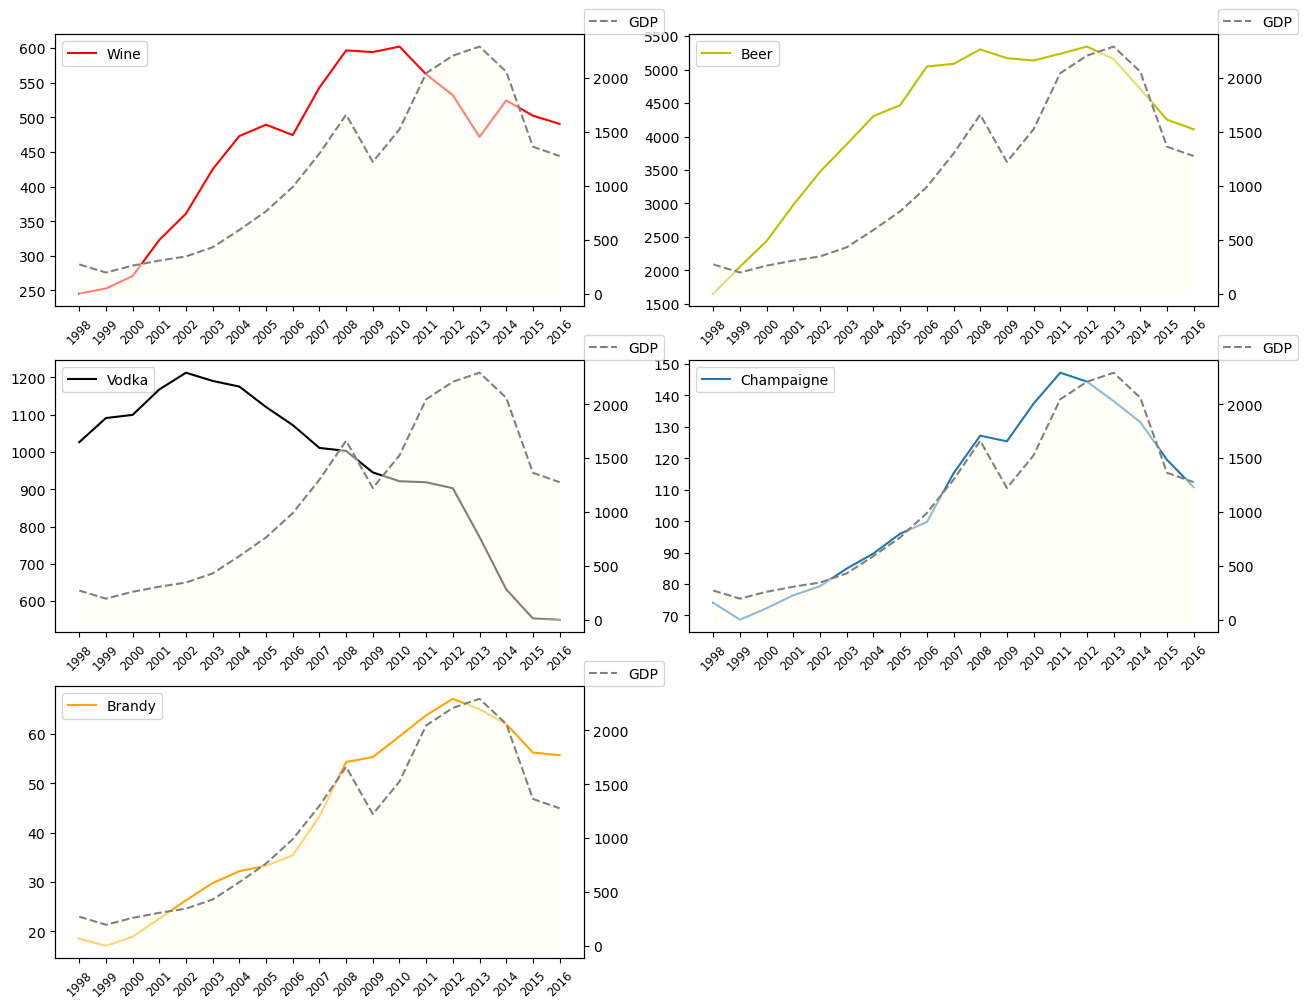

/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/4089429509.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/4089429509.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/4089429509.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/4089429509.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_53243/4089429509.py:77: UserWarning: FixedFormatter should only b

Text(0, 0.5, 'Brandy')

<Figure size 640x480 with 0 Axes>

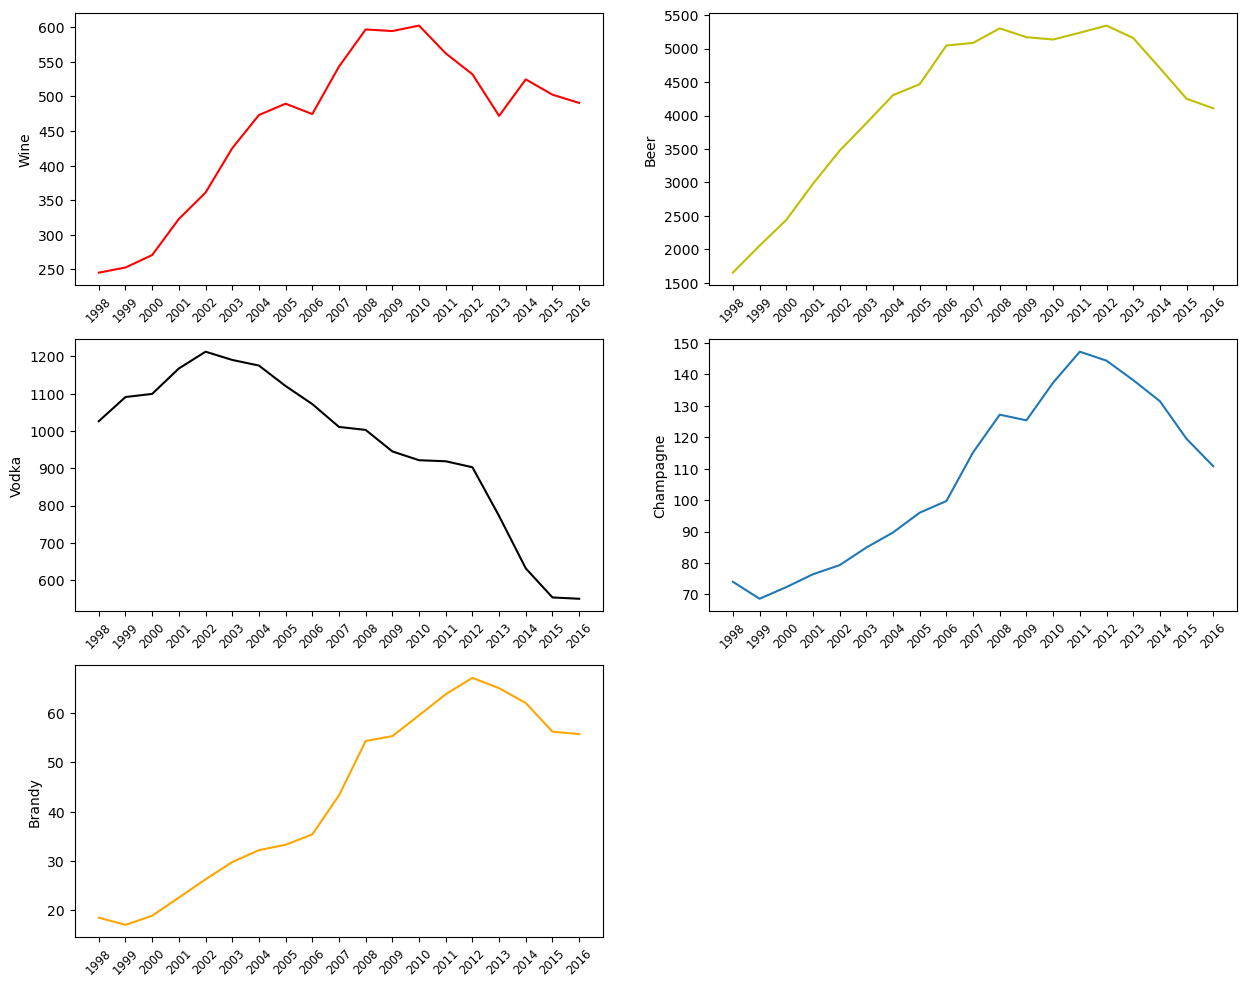

In [42]:
# How does Russia's alcohol consumption type change with economic/unemployment conditions
# Plotting alcohol by year

year_group=clean_alc.groupby(clean_alc["year"]).sum()
gdp_clean_df=gdp_df[gdp_df["Date"].astype(int)<=2016]

x_axis=list(map(str,year_group.index))

fig = plt.figure()
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax1.plot(x_axis, year_group['wine'], 'r',label="Wine") #row 0, col 0 
ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax1.legend(loc="upper left") #or upper right
ax1 = ax1.twinx()
ax1.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax1.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax1.legend(loc=(1.0, 1.0))
ax2.plot(x_axis, year_group['beer'],'y',label="Beer")
ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax2.legend(loc="upper left")
ax2 = ax2.twinx()
ax2.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax2.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax2.legend(loc=(1.0, 1.0))
ax3.plot(x_axis, year_group['vodka'],'black',label="Vodka")
ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax3.legend(loc="upper left")
ax3 = ax3.twinx()
ax3.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax3.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax3.legend(loc=(1.0, 1.0))
ax4.plot(x_axis, year_group['champagne'],label="Champaigne")
ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax4.legend(loc="upper left")
ax4 = ax4.twinx()
ax4.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax4.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax4.legend(loc=(1.0, 1.0))
ax5.plot(x_axis, year_group['brandy'],'orange',label="Brandy")
ax5.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax5.legend(loc="upper left")
ax5 = ax5.twinx()
ax5.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax5.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax5.legend(loc=(1.0, 1.0))

plt.show();
 




fig = plt.figure()
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax1.plot(x_axis, year_group['wine'], 'r') #row 0, col 0 )
ax2.plot(x_axis, year_group['beer'],'y')

ax3.plot(x_axis, year_group['vodka'],'black')
ax4.plot(x_axis, year_group['champagne'])
ax5.plot(x_axis, year_group['brandy'],'orange')
ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax5.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax1.set_ylabel('Wine') 
ax2.set_ylabel('Beer') 
ax3.set_ylabel('Vodka') 
ax4.set_ylabel('Champagne') 
ax5.set_ylabel('Brandy') 
ax1.set_ylabel('Wine') 
ax2.set_ylabel('Beer') 
ax3.set_ylabel('Vodka') 
ax4.set_ylabel('Champagne') 
ax5.set_ylabel('Brandy') 

The correlation coefficient between wine and GDP is 0.77.
The correlation coefficient between beer and GDP is 0.81.
The correlation coefficient between vodka and GDP is -0.66.
The correlation coefficient between champagne and GDP is 0.97.
The correlation coefficient between brandy and GDP is 0.96.
The correlation coefficient between brandy and GDP is 0.74.


<Figure size 640x480 with 0 Axes>

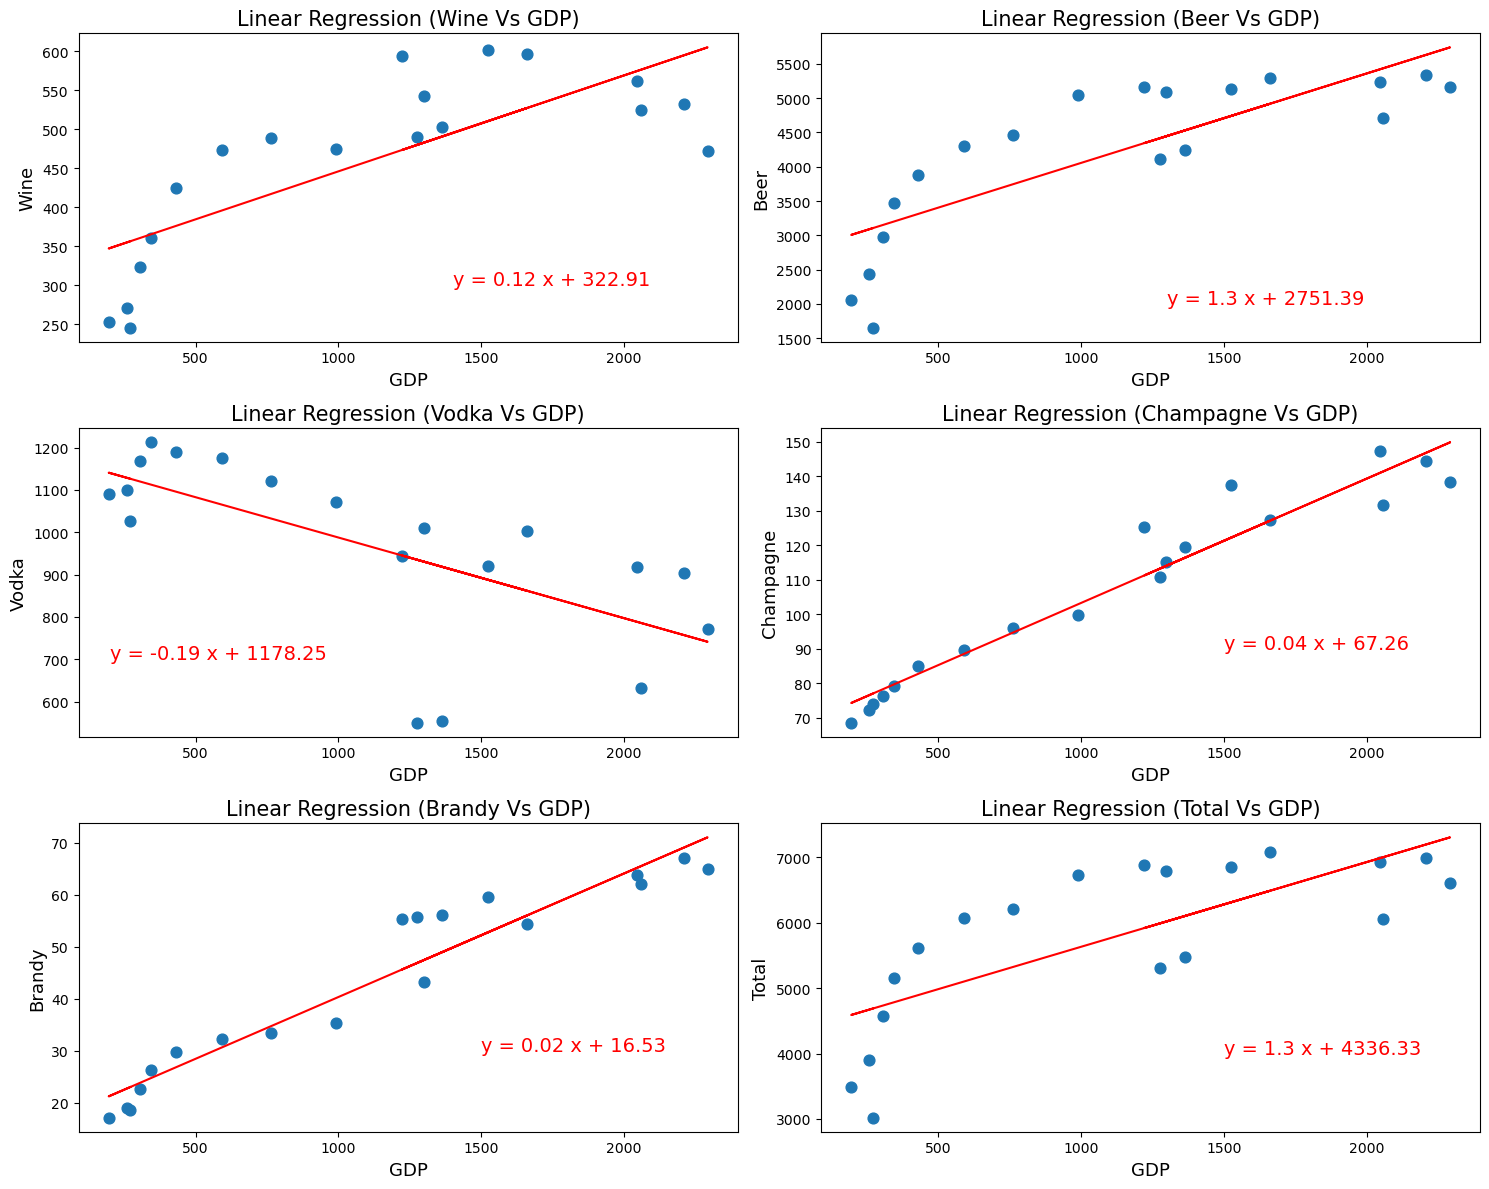

In [81]:
# Can we predict alcohol consumption based on unemployment rate in the future

fig = plt.figure()
fig = plt.figure(figsize=(15, 12))
x_value=gdp_clean_df['GDP (in billions)']
wine_value=year_group['wine']
beer_value=year_group['beer']
vodka_value=year_group['vodka']
champagne_value=year_group['champagne']
brandy_value=year_group['brandy']
total_value=year_group['Total']

correlation = round(st.pearsonr(x_value, wine_value)[0],2)
print(f"The correlation coefficient between wine and GDP is {correlation}.")
correlation = round(st.pearsonr(x_value, beer_value)[0],2)
print(f"The correlation coefficient between beer and GDP is {correlation}.")
correlation = round(st.pearsonr(x_value, vodka_value)[0],2)
print(f"The correlation coefficient between vodka and GDP is {correlation}.")
correlation = round(st.pearsonr(x_value, champagne_value)[0],2)
print(f"The correlation coefficient between champagne and GDP is {correlation}.")
correlation = round(st.pearsonr(x_value, brandy_value)[0],2)
print(f"The correlation coefficient between brandy and GDP is {correlation}.")
correlation = round(st.pearsonr(x_value, total_value)[0],2)
print(f"The correlation coefficient between brandy and GDP is {correlation}.")

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value, wine_value)
wine_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax1.scatter(x_value, wine_value, color="#1f77b4",s=60)
ax1.plot(x_value, wine_regress_values,color='red')
ax1.set_title("Linear Regression (Wine Vs GDP)", fontsize=15)
ax1.set_xlabel("GDP", fontsize =13)
ax1.set_ylabel("Wine", fontsize =13)
ax1.annotate(line_eq,(1400,300), fontsize=14, color="red")


(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value,  beer_value)
beer_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax2.scatter(x_value, beer_value, color="#1f77b4",s=60)
ax2.plot(x_value, beer_regress_values,color='red')
ax2.set_title("Linear Regression (Beer Vs GDP)", fontsize=15)
ax2.set_xlabel("GDP", fontsize =13)
ax2.set_ylabel("Beer", fontsize =13)
ax2.annotate(line_eq,(1300,2000), fontsize=14, color="red")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value,  vodka_value)
vodka_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax3.scatter(x_value, vodka_value, color="#1f77b4",s=60)
ax3.plot(x_value, vodka_regress_values,color='red')
ax3.set_title("Linear Regression (Vodka Vs GDP)", fontsize=15)
ax3.set_xlabel("GDP", fontsize =13)
ax3.set_ylabel("Vodka", fontsize =13)
ax3.annotate(line_eq,(200,700), fontsize=14, color="red")


(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value,  champagne_value)
champagne_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax4.scatter(x_value, champagne_value, color="#1f77b4",s=60)
ax4.plot(x_value, champagne_regress_values,color='red')
ax4.set_title("Linear Regression (Champagne Vs GDP)", fontsize=15)
ax4.set_xlabel("GDP", fontsize =13)
ax4.set_ylabel("Champagne", fontsize =13)
ax4.annotate(line_eq,(1500,90), fontsize=14, color="red")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value,  brandy_value)
brandy_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax5.scatter(x_value, brandy_value, color="#1f77b4",s=60)
ax5.plot(x_value, brandy_regress_values,color='red')
ax5.set_title("Linear Regression (Brandy Vs GDP)", fontsize=15)
ax5.set_xlabel("GDP", fontsize =13)
ax5.set_ylabel("Brandy", fontsize =13)
ax5.annotate(line_eq,(1500,30), fontsize=14, color="red")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value, total_value)
total_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax6.scatter(x_value, total_value, color="#1f77b4",s=60)
ax6.plot(x_value, total_regress_values,color='red')
ax6.set_title("Linear Regression (Total Vs GDP)", fontsize=15)
ax6.set_xlabel("GDP", fontsize =13)
ax6.set_ylabel("Total", fontsize =13)
ax6.annotate(line_eq,(1500,4000), fontsize=14, color="red")

fig=plt.tight_layout()

In [28]:
alc_df
largest_wine=alc_df[alc_df["year"]==2016].nlargest(3,"wine")
largest_beer=alc_df[alc_df["year"]==2016].nlargest(3,"beer")
largest_vodka=alc_df[alc_df["year"]==2016].nlargest(3,"vodka")
largest_champagne=alc_df[alc_df["year"]==2016].nlargest(3,"champagne")
largest_brandy=alc_df[alc_df["year"]==2016].nlargest(3,"brandy")
print(largest_brandy)

      year            region  wine  beer  vodka  champagne  brandy
1571  2016   Murmansk Oblast   8.1  47.6   12.2        2.5     1.9
1553  2016    Kamchatka Krai   6.6  85.4   10.4        3.3     1.3
1564  2016  Leningrad Oblast   8.1  41.0    8.4        1.6     1.3
